<a href="https://colab.research.google.com/github/OSolerHugo/5dataglowup/blob/main/21-Ice_Extent/21_Ice_Extent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import calendar

from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
df_N = pd.read_csv('drive/My Drive/coolab/5DataGlowUp/Desafio_21/N_seaice_extent_daily_v3.0.csv')
df_S = pd.read_csv('drive/My Drive/coolab/5DataGlowUp/Desafio_21/s_seaice_extent_daily_v3_0.csv')

df_N.head()
#extent and missing is in 10^6 sq km

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


In [3]:
df_N.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

In [4]:
renames = {
    ' Month': 'Month',
    ' Day' : 'Day',
    '     Extent': 'Extent',
    '    Missing': 'Missing',
    ' Source Data': 'Source_Data'
}

df_N.rename(columns= renames, inplace=True)
df_N.drop(0, inplace=True)

df_N.head()

,Year,Month,Day,Extent,Missing,Source_Data
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
5,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


In [5]:
df_N['Extent'] = df_N['Extent'].astype(float)

In [6]:
df_N.isnull().sum()

Year           0
Month          0
Day            0
Extent         0
Missing        0
Source_Data    0
dtype: int64

In [7]:
df_N['Date'] = pd.to_datetime(df_N[['Year','Month','Day']])

df_N.head()

,Year,Month,Day,Extent,Missing,Source_Data,Date
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...,1978-10-26
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...,1978-10-28
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...,1978-10-30
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...,1978-11-01
5,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...,1978-11-03


In [8]:
df_S.columns

Index(['year', 'month', 'day', 'extent_10_6_sq_km', 'missing_10_6_sq_km',
       'source_data', 'date'],
      dtype='object')

In [9]:
renames = {
    'extent_10_6_sq_km': 'extent',
    'missing_10_6_sq_km': 'missing'
}

df_S.rename(columns= renames, inplace=True)
df_S['date'] = pd.to_datetime(df_S['date'])

df_S.head()

,year,month,day,extent,missing,source_data,date
0,1978,10,26,17.624,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_197...,1978-10-26
1,1978,10,28,17.803,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_197...,1978-10-28
2,1978,10,30,17.670,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_197...,1978-10-30
3,1978,11,1,17.527,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_197...,1978-11-01
4,1978,11,3,17.486,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_197...,1978-11-03


<ipython-input-10-755567cfee30>:6: UserWarning: 
The palette list has fewer values (1) than needed (46) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_S, x='month', y='extent', hue='year', marker='o', palette=['gray'], legend= False)


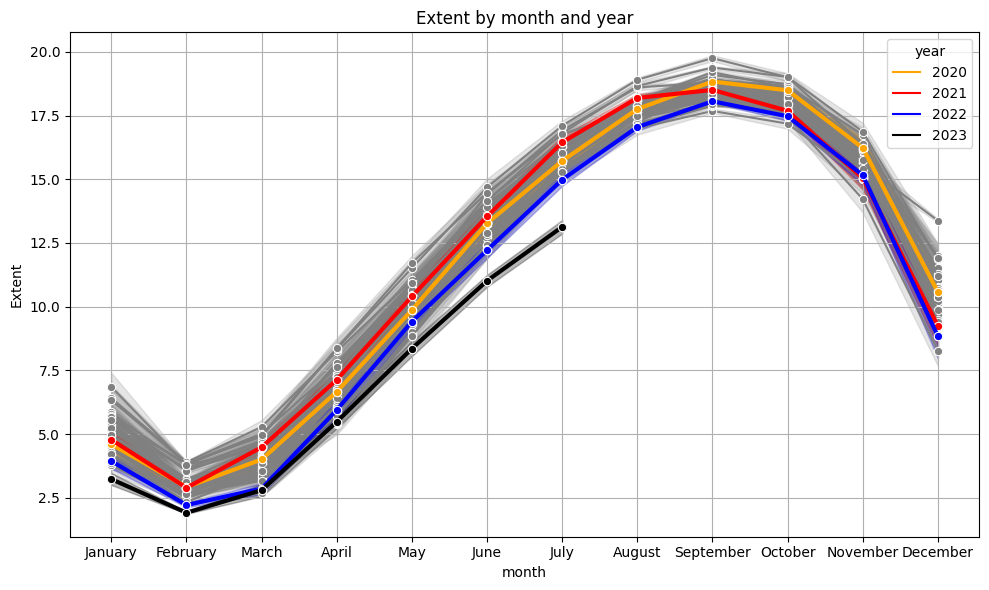

In [10]:
df_S_highlighted = df_S[df_S['year'].isin([2020,2021,2022,2023])]



plt.figure(figsize=(10, 6))
sns.lineplot(data=df_S, x='month', y='extent', hue='year', marker='o', palette=['gray'], legend= False)
sns.lineplot(data=df_S_highlighted, x='month', y='extent', hue='year', marker='o', palette=['orange','red','blue', 'black'], linewidth=3)
#plt.xlabel('Month')
plt.ylabel('Extent')
plt.title('Extent by month and year')

month_names = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(range(1, 13), month_names)


plt.grid(True)
plt.tight_layout()
plt.show()


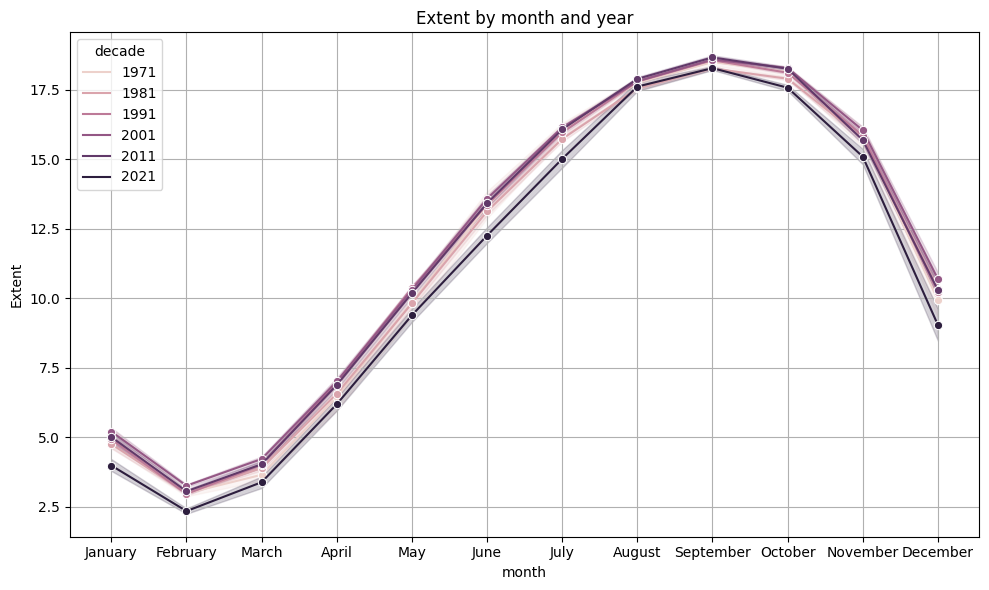

In [11]:
df_S['month'] = df_S['date'].dt.month
df_S['year'] = df_S['date'].dt.year

# Criar uma coluna para representar a década (anos agrupados de 10 em 10)
df_S['decade'] = ((df_S['year'] - 1) // 10) * 10 + 1



# Plotar o gráfico usando o Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_S, x='month', y='extent', hue='decade', marker='o')
#plt.xlabel('Month')
plt.ylabel('Extent')
plt.title('Extent by month and year')
plt.xticks(range(1, 13), calendar.month_name[1:13])
plt.grid(True)
plt.tight_layout()
plt.show()

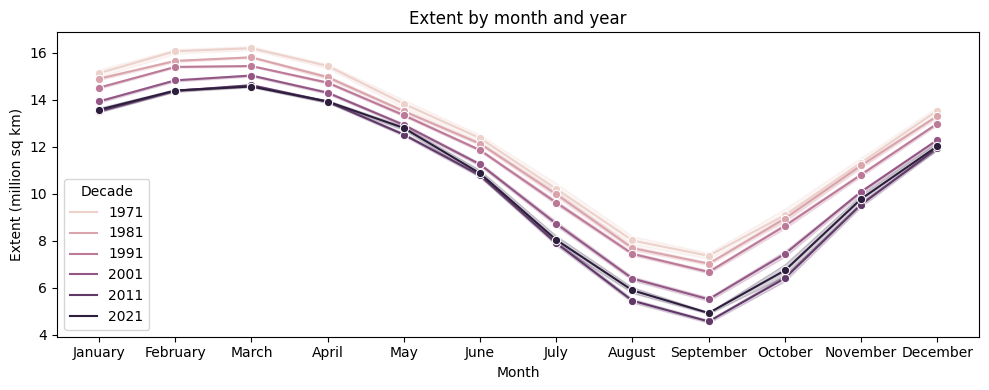

In [15]:
df_N['Month'] = df_N['Date'].dt.month
df_N['Year'] = df_N['Date'].dt.year

# Criar uma coluna para representar a década (anos agrupados de 10 em 10)
df_N['Decade'] = ((df_N['Year'] - 1) // 10) * 10 + 1



# Plotar o gráfico usando o Seaborn
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_N, x='Month', y='Extent', hue='Decade', marker='o')
plt.xlabel('Month')
plt.ylabel('Extent (million sq km)')
plt.title('Extent by month and year')
plt.xticks(range(1, 13), calendar.month_name[1:13])
#plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig('demo.png', transparent=True)

In [13]:
#Data https://gml.noaa.gov/ccgg/trends/data.html
df_co2 = pd.read_csv('drive/My Drive/coolab/5DataGlowUp/Desafio_21/co2_mm_gl.csv')
df_co2.head()

,year,month,decimal,average,average_unc,trend,trend_unc
0,1979,1,1979.042,336.56,0.10,335.92,0.09
1,1979,2,1979.125,337.29,0.09,336.25,0.09
2,1979,3,1979.208,337.88,0.10,336.51,0.09
3,1979,4,1979.292,338.32,0.11,336.72,0.09
4,1979,5,1979.375,338.26,0.04,336.71,0.10


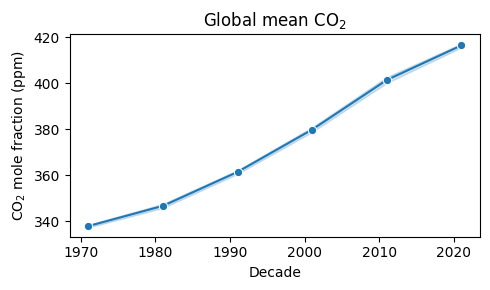

In [16]:
# Criar uma coluna para representar a década (anos agrupados de 10 em 10)
df_co2['decade'] = ((df_co2['year'] - 1) // 10) * 10 + 1

# Plotar o gráfico usando o Seaborn
plt.figure(figsize=(5, 3))
sns.lineplot(data=df_co2, x='decade', y='average',  marker='o')
plt.xlabel('Decade')
plt.ylabel('CO$_2$ mole fraction (ppm)')
plt.title('Global mean CO$_2$')
#plt.xticks(range(1, 13), calendar.month_name[1:13])
#plt.grid(True)
plt.tight_layout()
plt.savefig('co2.png', transparent=True)
plt.show()